<a href="https://colab.research.google.com/github/quantum-mechanics405/detect_umar/blob/main/the_best_model_too_far128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Preprocessing the image for training



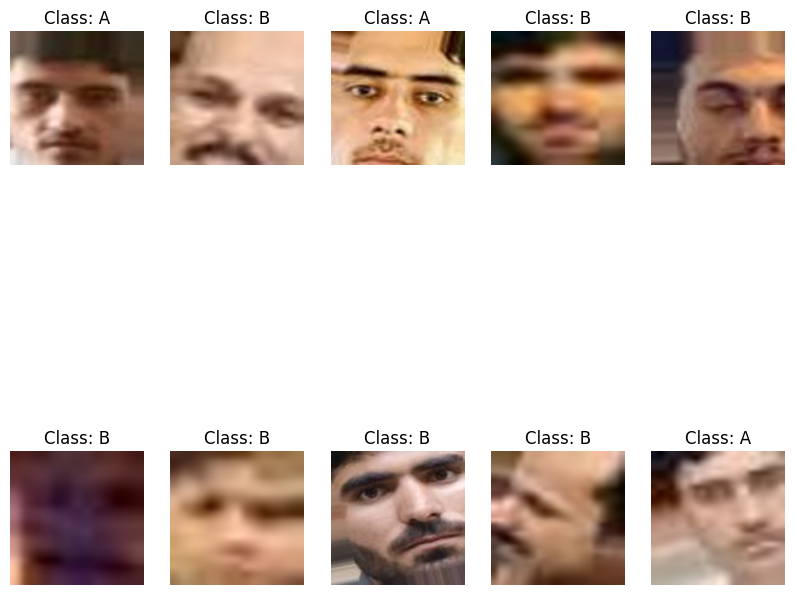

In [ ]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Load and Preprocess Images
def load_and_preprocess_images(folder_A, folder_B, target_size=(128, 128)):
    images = []
    labels = []

    # Process images in class A
    for filename in os.listdir(folder_A):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(folder_A, filename)
            img = Image.open(img_path).convert("RGB")
            img_array = preprocess_image(img, target_size)
            images.append(img_array)
            labels.append(0)  # Label 0 for class A

    # Process images in class B
    for filename in os.listdir(folder_B):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(folder_B, filename)
            img = Image.open(img_path).convert("RGB")
            img_array = preprocess_image(img, target_size)
            images.append(img_array)
            labels.append(1)  # Label 1 for class B

    # Shuffle images and labels together
    combined = list(zip(images, labels))
    random.shuffle(combined)
    images[:], labels[:] = zip(*combined)

    # Remove the extra dimension (1) from the images array
    return np.squeeze(np.array(images)), np.array(labels)

# Preprocess image function
def preprocess_image(image, target_size=(64, 64)):
    # Convert NumPy array back to PIL Image if needed
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    # Resize the image to target_size
    img = image.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 64, 64, 3)
    return img_array

# Step 2: Split Dataset
def split_dataset(images, labels, val_size=0.05, test_size=0.1):
    # First split off the test set
    X_train_val, X_test, y_train_val, y_test = train_test_split(images, labels, test_size=test_size, random_state=42)
    # Then split the remaining data into training and validation sets
    val_split = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_split, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Path variables
folder_A = '/content/drive/MyDrive/Data Set Colab/aug_umar_pic'  # Adjust with your path
folder_B = '/content/drive/MyDrive/Data Set Colab/aug_not_umar'  # Adjust with your path

# Load images directly from the specified folders
images, labels = load_and_preprocess_images(folder_A, folder_B)

# Split dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(images, labels)

# Show first 10 images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])  # No need to squeeze, extra dimension is removed
    plt.title("Class: " + ("A" if y_train[i] == 0 else "B"))
    plt.axis('off')
plt.show()


##Training the Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.6443 - loss: 0.6635 - val_accuracy: 0.7793 - val_loss: 0.5516
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.6710 - loss: 0.6339 - val_accuracy: 0.7793 - val_loss: 0.5119
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.6693 - loss: 0.5917 - val_accuracy: 0.7862 - val_loss: 0.4953
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.7012 - loss: 0.5490 - val_accuracy: 0.8000 - val_loss: 0.4464
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7295 - loss: 0.4987 - val_accuracy: 0.8759 - val_loss: 0.3542
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7922 - loss: 0.4450 - val_accuracy: 0.8000 - val_loss: 0.4306
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8172 - loss: 0.4133 - val_accuracy: 0.8966 - val_loss: 0.2990
Epoch 8/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 78s 993ms/step - accuracy: 0.8434 - loss: 0.3406 - val_accuracy: 0.8828 - val_

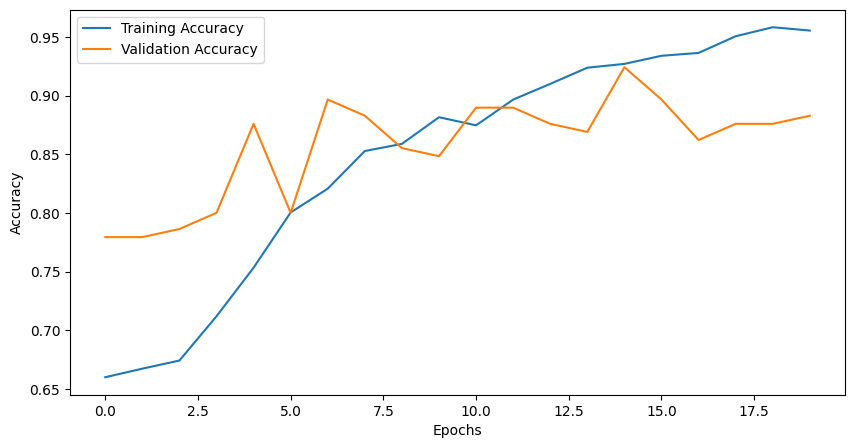

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Define the CNN Model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),

        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model

# Step 2: Compile the Model
input_shape = (128, 128, 3)  # Image shape after resizing
model = create_cnn_model(input_shape)
model.compile(optimizer=Adam(learning_rate=0.0009),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stopping]
)

# Step 4: Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

# (Optional) Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


##Confusion Matrix

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 515ms/step


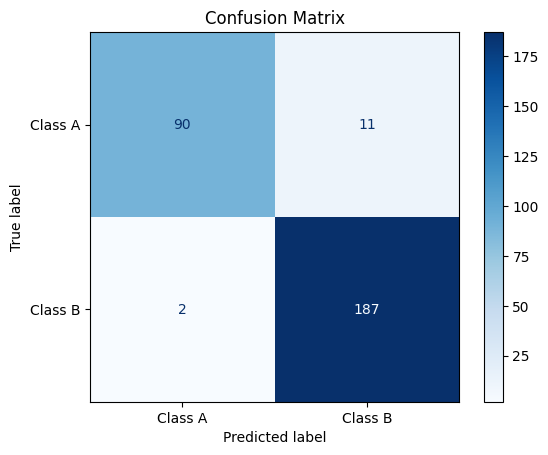

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict on the test set
y_pred = (loaded_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# Step 2: Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class A", "Class B"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
X_test.shape

(290, 128, 128, 3)

##Saving the Model

In [ ]:
# Step 1: Save the model
model.save('trained_cnn_model_on_umar128.h5')

##Loading the Model

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/drive/MyDrive/Data Set Colab/trained_cnn_model_on_umar128.h5')

# You can now use loaded_model for predictions
# Example: loaded_model.predict(new_data)


##Classifying the Picture

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


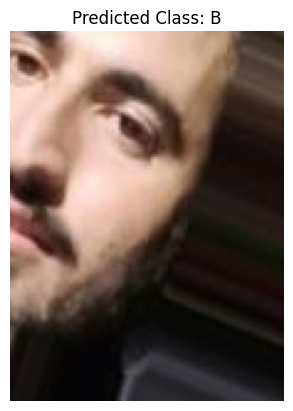

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(128, 128)):
    # Load and resize the image to target_size
    img = Image.open(image_path).convert("RGB")
    img = img.resize(target_size)

    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 64, 64, 3)
    return img_array


def predict_image_class(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make prediction
    prediction = loaded_model.predict(img_array)
    predicted_class = (prediction > 0.5).astype("int32")[0][0]  # Convert to binary class

    return predicted_class

def resize_with_aspect_ratio(image, target_size):
    # Calculate the aspect ratio and resize image while maintaining it
    img_ratio = image.width / image.height
    target_ratio = target_size[0] / target_size[1]

    if img_ratio > target_ratio:
        # Width is the constraining dimension
        new_width = target_size[0]
        new_height = int(new_width / img_ratio)
    else:
        # Height is the constraining dimension
        new_height = target_size[1]
        new_width = int(new_height * img_ratio)

    return image.resize((new_width, new_height), Image.LANCZOS)

# Your existing functions here

# Path to the image you want to predict
image_path = '/content/drive/MyDrive/Data Set Colab/aug_not_umar/IMG-20221113-WA0000_face_1_0_1834.jpg'  # Replace with the actual image path

# Predict the class of the image
predicted_class = predict_image_class(image_path)

# Display the image and the prediction
img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Predicted Class: {'A' if predicted_class == 0 else 'B'}")
plt.axis('off')
plt.show()


##Detecting faces from given Image and show faces

In [ ]:
!pip install mtcnn
!pip uninstall -y lz4 joblib
!pip install lz4 joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.2 MB/s eta 0:00:00
Found existing installation: lz4 4.3.3
Uninstalling lz4-4.3.3:
  Successfully uninstalled lz4-4.3.3
Found existing installation: joblib 1.4.2
Uninstalling joblib-1.4.2:
  Successfully uninstalled joblib-1.4.2
  Using cached lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.7 kB)
Using cached lz4-4.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.5 MB/s eta 0:00:00


Isolated face 1 from the image.
Isolated face 2 from the image.
Isolated face 3 from the image.


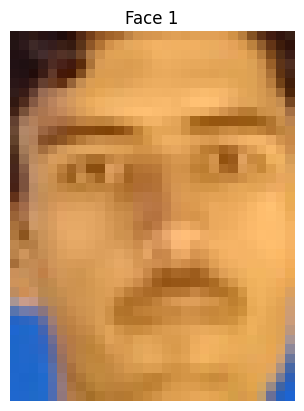

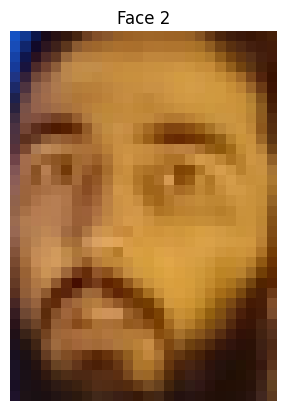

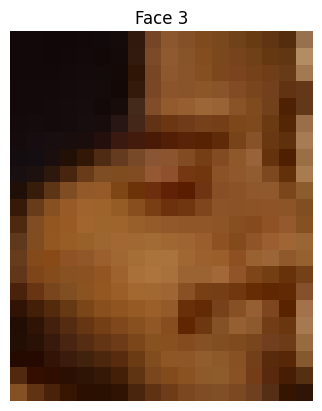

3 faces were isolated from the image.


In [ ]:
import cv2
from mtcnn import MTCNN
from PIL import Image, ExifTags
import numpy as np
import gc

# Initialize the MTCNN face detector
detector = MTCNN()

def correct_image_orientation(image):
    try:
        # Get the image's EXIF data
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break

        exif = image._getexif()

        if exif is not None and orientation in exif:
            if exif[orientation] == 3:
                image = image.rotate(180, expand=True)
            elif exif[orientation] == 6:
                image = image.rotate(270, expand=True)
            elif exif[orientation] == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        # If there's no EXIF data or no orientation tag, do nothing
        pass

    return image

def detect_faces_from_image(image_path):
    # Load and correct the orientation of the image
    img = Image.open(image_path)
    img = correct_image_orientation(img)

    # Resize the image to make face detection faster while keeping the aspect ratio
    img.thumbnail((640, 480))

    # Convert the image to RGB format for MTCNN
    # img_rgb = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img_rgb =np.array(img)
    # Detect faces in the image
    faces = detector.detect_faces(img_rgb)

    # Store detected face images in a list
    face_images = []

    # Extract faces if any are detected
    for i, face in enumerate(faces):
        # Get the bounding box for each face
        x, y, width, height = face['box']

        # Crop the face from the image
        face_img = img_rgb[y:y + height, x:x + width]

        # Convert the face to RGB for consistency
        # face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
        face_img_rgb = face_img

        # Append face image to the list
        face_images.append(face_img_rgb)

        print(f'Isolated face {i + 1} from the image.')

    # Clear variables and collect garbage to free memory
    del img, img_rgb, faces
    gc.collect()

    return face_images

# Usage
image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG-20231028-WA0050.jpg'  # Replace with the actual path to the image
faces = detect_faces_from_image(image_path)

# Display the faces if you want
import matplotlib.pyplot as plt

for i, face in enumerate(faces):
    plt.imshow(face)
    plt.title(f"Face {i + 1}")
    plt.axis('off')
    plt.show()

print(f"{len(faces)} faces were isolated from the image.")


##Umar in the picture?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


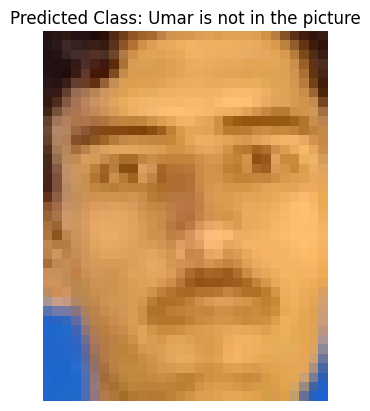

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


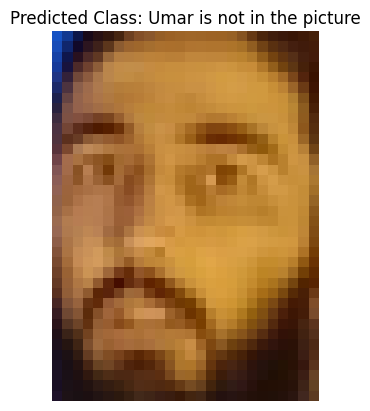

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


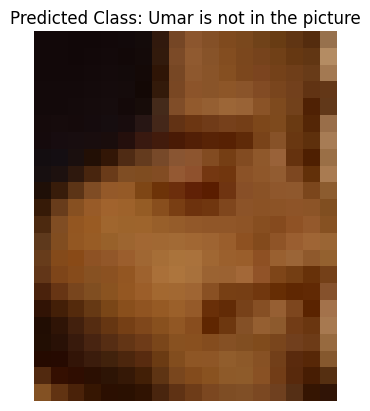

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Ensure you have this imported for any necessary cv2 functions.

def preprocess_image(image, target_size=(128, 128)):
    # Convert NumPy array back to PIL Image if needed
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)

    # Resize the image to target_size
    img = image.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 64, 64, 3)
    return img_array

def predict_image_class(image):
    # Preprocess the image
    img_array = preprocess_image(image)

    # Make prediction
    prediction = loaded_model.predict(img_array)
    predicted_class = (prediction > 0.5).astype("int32")[0][0]  # Convert to binary class

    return predicted_class

# Iterate through each image in the faces list and classify
for i, face in enumerate(faces):
    # Since `faces` contains NumPy arrays, we can directly use them in `predict_image_class`.
    predicted_class = predict_image_class(face)

    # Display the image and the prediction
    plt.imshow(face)  # `face` is already in RGB format
    plt.title(f"Predicted Class: {'Umar is in the picture' if predicted_class == 0 else 'Umar is not in the picture'}")
    plt.axis('off')
    plt.show()


#important

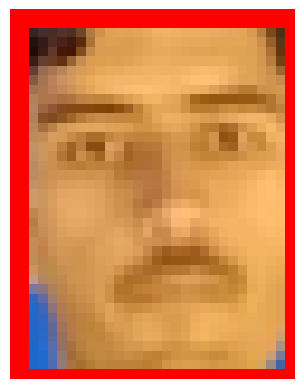

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1


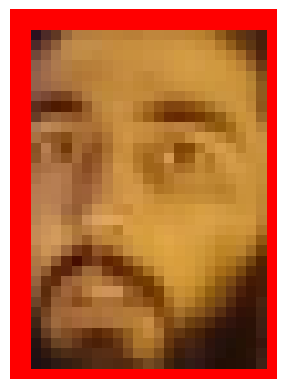

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1


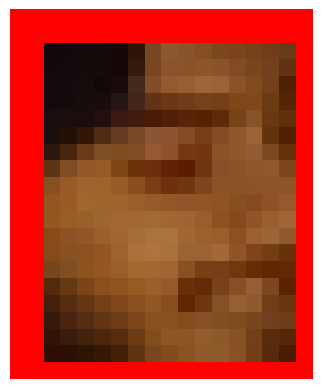

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
0


In [ ]:
for i, face in enumerate(faces):
  x, y, width, height = face['box']
  face_img = img_rgb[y:y + height, x:x + width]
  # face_img=cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
  # face_img=cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
  plt.imshow(face_img)
  plt.axis('off')
  plt.show()
  predicted_class = predict_image_class(face_img)
  print(predicted_class)

# gc.collect()
  # print(i+1)

#final Corrected

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1


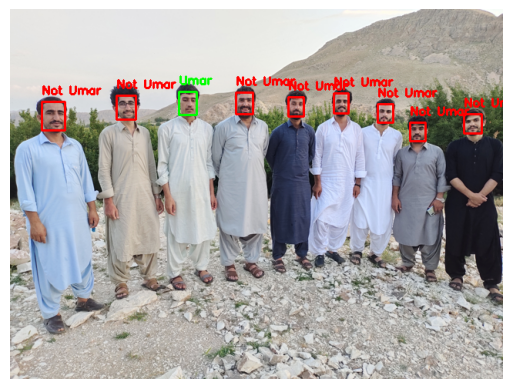

5867

In [ ]:
import cv2
from mtcnn import MTCNN
from PIL import Image, ExifTags
import numpy as np
import matplotlib.pyplot as plt
import gc

# Initialize the MTCNN face detector
detector = MTCNN()

# Load your model here
# loaded_model = ...  # Ensure you load your trained model

def correct_image_orientation(image):
    try:
        # Get the image's EXIF data
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break

        exif = image._getexif()

        if exif is not None and orientation in exif:
            if exif[orientation] == 3:
                image = image.rotate(180, expand=True)
            elif exif[orientation] == 6:
                image = image.rotate(270, expand=True)
            elif exif[orientation] == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass

    return image

def detect_faces_from_image(image_path):
    img = Image.open(image_path)
    img = correct_image_orientation(img)
    img.thumbnail((640, 480))  # Resize for faster detection
    # img_rgb = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img_rgb = np.array(img)
    faces = detector.detect_faces(img_rgb)
    return img_rgb, faces

def preprocess_image(image, target_size=(128, 128)):
    img = Image.fromarray(image) if isinstance(image, np.ndarray) else image
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def predict_image_class(image):
    img_array = preprocess_image(image)
    prediction = loaded_model.predict(img_array)
    return (prediction > 0.5).astype("int32")[0][0]

# Main code
# image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG-20240310-WA0024.jpg'  # Replace with the actual path
# image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG-20221113-WA0000.jpg'  # Replace with the actual path
# image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG_20231104_210207.jpg'  # Replace with the actual path
# image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG-20231028-WA0064.jpg'  # Replace with the actual path
# image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG-20231028-WA0050.jpg'  # Replace with the actual path
# image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG-20231028-WA0064.jpg'  # Replace with the actual path
image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG_20230701_191850.jpg'
# image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG_20240411_152334.jpg'

img_rgb, faces = detect_faces_from_image(image_path)

# Draw rectangles around detected faces and classify them
for face in faces:
    x, y, width, height = face['box']
    face_img = img_rgb[y:y + height, x:x + width]
    # face_img=cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    # plt.imshow(face_img)
    # plt.axis('off')
    # plt.show()
    predicted_class = predict_image_class(face_img)
    print(predicted_class)




    # x, y, width, height = face['box']
    # face_img = img_rgb[y:y + height, x:x + width]
    # face_img=cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
    # predicted_class = predict_image_class(face_img)
    # print(predicted_class)
    # Draw rectangle and label if it's class A (0)
    if predicted_class == 0:  # Class A
        cv2.rectangle(img_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)  # Green rectangle
        cv2.putText(img_rgb, 'Umar', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    else:
        cv2.rectangle(img_rgb, (x, y), (x + width, y + height), (255, 0, 0), 2)  # Green rectangle
        cv2.putText(img_rgb, 'Not Umar', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


# Convert back to RGB for displaying
# img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Show the final image with detections
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

gc.collect()


##Just detect the face

In [ ]:
import cv2
from mtcnn import MTCNN
from PIL import Image, ExifTags
import numpy as np
import matplotlib.pyplot as plt

# Path to your image
image_path = '/content/drive/MyDrive/Data Set Colab/extract_all_pictures/all_picturs/IMG-20231028-WA0050.jpg'  # Replace with your image path

# Initialize the MTCNN face detector
detector = MTCNN()

def correct_image_orientation(image):
    try:
        # Get the image's EXIF data
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break

        exif = image._getexif()
        if exif is not None and orientation in exif:
            if exif[orientation] == 3:
                image = image.rotate(180, expand=True)
            elif exif[orientation] == 6:
                image = image.rotate(270, expand=True)
            elif exif[orientation] == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        pass
    return image

# Read and preprocess the image
img = Image.open(image_path)
img = correct_image_orientation(img)
img.thumbnail((640, 480))  # Resize to fit display

# Convert image to RGB for MTCNN
img_rgb = np.array(img)

# Detect faces
faces = detector.detect_faces(img_rgb)

# Draw rectangles around each detected face
for face in faces:
    x, y, width, height = face['box']
    cv2.rectangle(img_rgb, (x, y), (x + width, y + height), (0, 255, 0), 2)  # Green rectangle

# Display the image with labeled faces
plt.figure(figsize=(10, 10))
# plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
